In [3]:
import pandas as pd
import os

In [4]:
# Compile the data files under one file

directory = "C:\\Users\\JOLLY\\DOwnloads\\data"
dataf = []

for files in os.listdir(directory):
    if files.endswith(".txt"):
        fp = os.path.join(directory, files)
        df = pd.read_csv(fp, sep='\t')
        dataf.append(df)
        
data = pd.concat(dataf, ignore_index=True)

# View the database
print(data)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [5]:
#Data Process

#Calculate the mean of mRNA Expression, Protein Expression and Cell Viability of WT and Mutant
data['mRNA Expression WT'] = data[['mRNA.Expression.WT.Rep1', 'mRNA.Expression.WT.Rep2', 'mRNA.Expression.WT.Rep3']].mean(axis=1)
data['mRNA Expression Mut'] = data[['mRNA.Expression.Mut.Rep1', 'mRNA.Expression.Mut.Rep2', 'mRNA.Expression.Mut.Rep3']].mean(axis=1)

data['Protein Expression WT'] = data[['Protein.Expression.WT.Rep1', 'Protein.Expression.WT.Rep2', 'Protein.Expression.WT.Rep3']].mean(axis=1)
data['Protein Expression Mut'] = data[['Protein.Expression.Mut.Rep1', 'Protein.Expression.Mut.Rep2', 'Protein.Expression.Mut.Rep3']].mean(axis=1)

data['Cell Viability WT'] = data[['CellViability.WT.Rep1', 'CellViability.WT.Rep2', 'CellViability.WT.Rep3']].mean(axis=1)
data['Cell Viability Mut'] = data[['CellViability.Mut.Rep1', 'CellViability.Mut.Rep2', 'CellViability.Mut.Rep3']].mean(axis=1)

# Grouping and Aggregation
mean_std_data = data.groupby('Gene').agg({
    'mRNA Expression WT': ['mean', 'std'],
    'mRNA Expression Mut': ['mean', 'std'],
    'Protein Expression WT': ['mean', 'std'],
    'Protein Expression Mut': ['mean', 'std'],
    'Cell Viability WT': ['mean', 'std'],
    'Cell Viability Mut': ['mean', 'std']
})

print (data)


        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [6]:
#Data Analysis

# To identify the type of mutation
def mutation_type(row):
    wild_type_seq = row['WildType.Sequence']
    mutant_seq = row['Mutant.Sequence']
    
    if len(wild_type_seq) == len(mutant_seq):
        return "Substitution"
    elif len(wild_type_seq) < len(mutant_seq):
        return "Insertion"
    elif len(wild_type_seq) > len(mutant_seq):
        return "Deletion"
    else:
        return "Unknown"

data['Mutation Type'] = data.apply(mutation_type, axis=1)


# Mutation Location on promoter or CDS
def mutation_location(row):
    wild_type_seq = row['WildType.Sequence']
    mutant_seq = row['Mutant.Sequence']
    
    if len(mutant_seq) <= 1000:
        if mutant_seq != wild_type_seq:
            loc = 'Promoter'
    else:
        if mutant_seq[:1000] != wild_type_seq[:1000] and mutant_seq[1000:] != wild_type_seq[1000:]:
            loc = 'Promoter, CDS'
        elif mutant_seq[:1000] != wild_type_seq[:1000] and mutant_seq[1000:] == wild_type_seq[1000:]:
            loc = 'Promoter'
        elif mutant_seq[:1000] == wild_type_seq[:1000] and mutant_seq[1000:] != wild_type_seq[1000:]:
            loc = 'CDS'
    return loc

data['Mutation Location'] = data.apply(mutation_location, axis=1)



# Effect Analysis of Cell Viability
data['Cell Viability Change'] = data['Cell Viability Mut'] - data['Cell Viability WT']
 
def cellviability_change_effect(row):
    if row['Cell Viability Change'] > 0:
        return 'Increase'
    elif row['Cell Viability Change'] < 0:
        return 'Decrease'
    else:
        return 'No Change'

data['Cell Viability Change Effect'] = data.apply(cellviability_change_effect, axis=1)

#Effect Analysis of mRNA Expression
data['mRNA Expression Change'] = data['mRNA Expression Mut'] - data['mRNA Expression WT']

def mRNA_Expression_Change_effect(row):
    if row['mRNA Expression Change'] > 0:
        return 'Increase'
    elif row['mRNA Expression Change'] < 0:
        return 'Decrease'
    else:
        return 'No Change'

data['mRNA Expression Change Effect'] = data.apply(mRNA_Expression_Change_effect, axis=1)

#Effect Analysis od Protein Expression
data['Protein Expression Change'] = data['Protein Expression Mut'] - data['Protein Expression WT']

def Protein_Expression_Change_effect(row):
    if row['Protein Expression Change'] > 0:
        return 'Increase'
    elif row['Protein Expression Change'] < 0:
        return 'Decrease'
    else:
        return 'No Change'

data['Protein Expression Change Effect'] = data.apply(Protein_Expression_Change_effect, axis=1)

print (data)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [7]:
# Selection of Top 5 genes on the basis of highest Cell Viability 

sorted_data = data.sort_values(by='Cell Viability Change', ascending=False)

top_5_genes = sorted_data.head(5)

# Print the top 5 genes
print("Top 5 Genes based on Cell Viability Change:")
print(top_5_genes [['Gene','Mutation Type', 'Mutation Location', 'Cell Viability Change', 'mRNA Expression Change', 'Protein Expression Change']])

Top 5 Genes based on Cell Viability Change:
       Gene Mutation Type Mutation Location  Cell Viability Change  \
7     Avon4     Insertion     Promoter, CDS               5.215711   
26   Ist9a2      Deletion          Promoter               4.514477   
37  Nect1c1      Deletion     Promoter, CDS               4.436899   
14   Daz2b7  Substitution          Promoter               0.170895   
17   Euk4r4     Insertion     Promoter, CDS               0.135741   

    mRNA Expression Change  Protein Expression Change  
7                 1.445566               20031.666667  
26            -5010.362690                 -23.961772  
37               -0.743867              -16614.000000  
14                0.745162                   8.666667  
17                0.006077                   6.000000  


In [8]:
# Data Visualization

import seaborn as sbn
import matplotlib.pyplot as plt # this helps with writing cleaner code

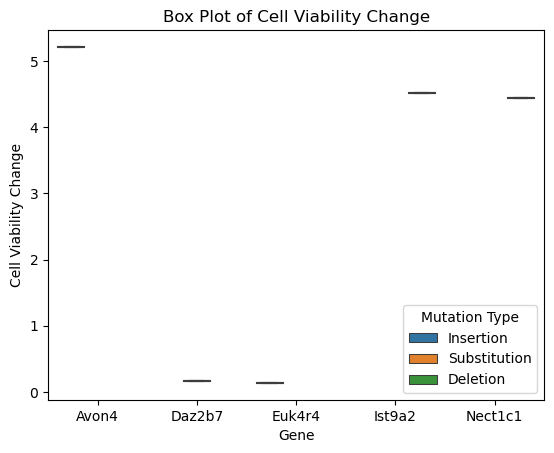

In [15]:
# Filter the DataFrame to include only the specified genes
selected_genes = ['Avon4', 'Ist9a2', 'Nect1c1', 'Daz2b7', 'Euk4r4']
filtered_data = data[data['Gene'].isin(selected_genes)]

# Create a boxplot
sbn.boxplot(x='Gene', y='Cell Viability Change', hue= 'Mutation Type', data=filtered_data)
plt.xlabel('Gene')
plt.ylabel('Cell Viability Change')
plt.title('Box Plot of Cell Viability Change')
plt.show()



Text(0, 0.5, 'Cell Viability Change')

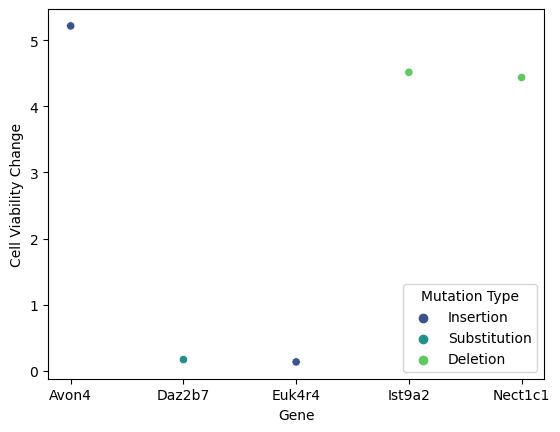

In [14]:
# Create a Scatter plot
sbn.scatterplot(x='Gene', y='Cell Viability Change', hue= 'Mutation Type', data=filtered_data, palette='viridis')
plt.xlabel('Gene')
plt.ylabel('Cell Viability Change')

C:\Users\JOLLY\AppData\Local\Temp\ipykernel_1412\2157179148.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sbn.kdeplot(data=filtered_data, x=filtered_data['Cell Viability Change'], hue=filtered_data['Mutation Type'])


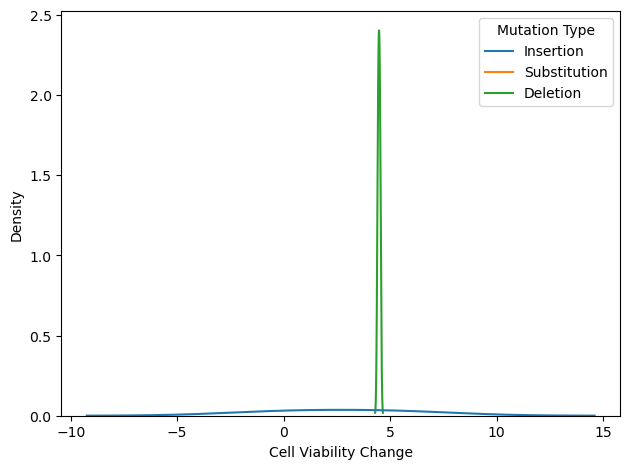

In [16]:
# Create a Kernel Density Plot
sbn.kdeplot(data=filtered_data, x=filtered_data['Cell Viability Change'], hue=filtered_data['Mutation Type'])
plt.xlabel('Cell Viability Change')
plt.ylabel('Density')
plt.tight_layout()
plt.show()